In [1]:
%pip install -U vnstock

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 44.3 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 539.2/539.2 kB 21.1 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24/24 [vnstock]3/24 [vnstock]]-types]
Note: you may need to restart the kernel to use updated packages.


In [21]:
from vnstock import Vnstock

# Khởi tạo đối tượng stock với mã 'TCB' và nguồn dữ liệu 'VCI'
stock = Vnstock().stock(symbol='TCB', source='VCI')

# Lấy dữ liệu lịch sử giá cổ phiếu trong 1 năm qua
df = stock.quote.history(start='2024-01-01', end='2025-11-18', interval='1D')

# In 5 dòng đầu tiên của dữ liệu
print(df.head())

# Lưu dữ liệu ra file Excel
# df.to_excel('gia_lich_su_ACB.xlsx', index=False)
# print("Đã lưu dữ liệu vào file 'gia_lich_su_ACB.xlsx'")

        time   open   high    low  close   volume
0 2023-11-24  14.34  14.46  13.91  14.20  4698748
1 2023-11-27  14.15  14.15  13.84  13.84  3050650
2 2023-11-28  13.84  14.15  13.60  14.15  3738613
3 2023-11-29  14.12  14.31  13.98  14.12  1780760
4 2023-11-30  14.05  14.20  13.94  13.94  2757865


In [22]:
df.tail(5)

,time,open,high,low,close,volume
489,2025-11-12,33.70,35.00,33.60,35.00,12025800
490,2025-11-13,34.65,35.50,34.60,35.10,12530800
491,2025-11-14,34.80,35.35,34.70,35.10,5603100
492,2025-11-17,35.10,35.25,34.70,35.15,9499500
493,2025-11-18,35.20,35.35,34.95,35.35,8594800


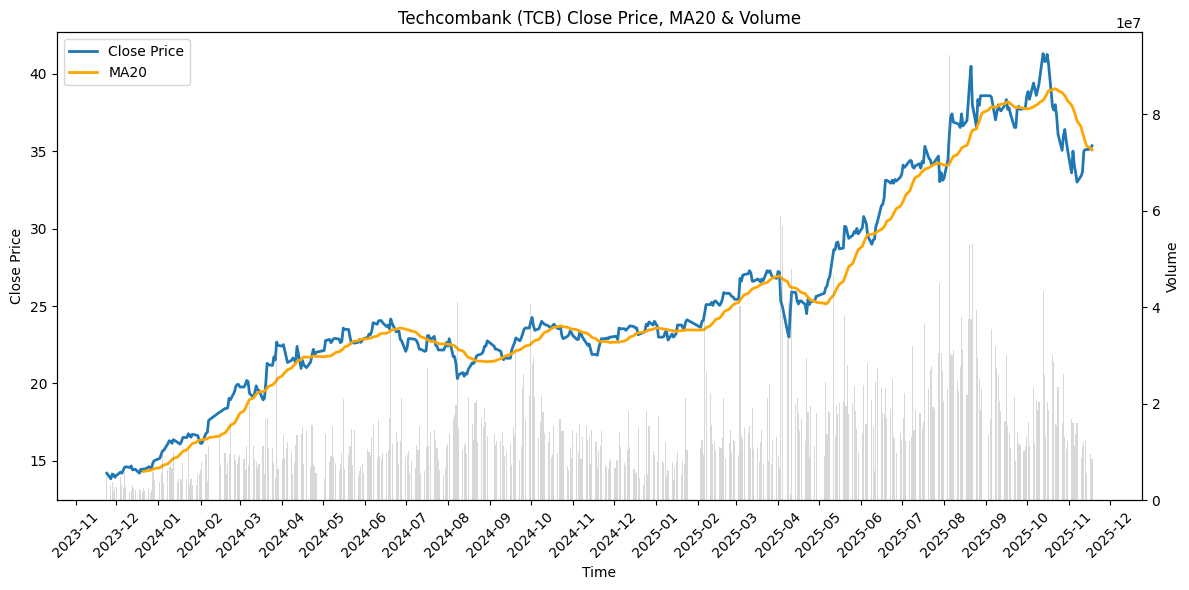

In [29]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# --- Tính MA20 ---
df['MA20'] = df['close'].rolling(window=20).mean()

fig, ax1 = plt.subplots(figsize=(12,6))

# --- Close price line (Y1) ---
ax1.plot(df["time"], df["close"], linewidth=2, label="Close Price")
ax1.plot(df["time"], df["MA20"], linewidth=2, color='orange', label="MA20")  # MA20 line
ax1.set_xlabel("Time")
ax1.set_ylabel("Close Price")
ax1.set_title("Techcombank (TCB) Close Price, MA20 & Volume")
ax1.legend()
# set display monthly
ax1.xaxis.set_major_locator(mdates.MonthLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax1.tick_params(axis="x", rotation=45)

# --- Volume bar (Y2) ---
ax2 = ax1.twinx()  # tạo trục Y thứ 2 chung trục X
ax2.bar(df["time"], df["volume"], alpha=0.3, color='gray')
ax2.set_ylabel("Volume")

plt.tight_layout()
plt.show()


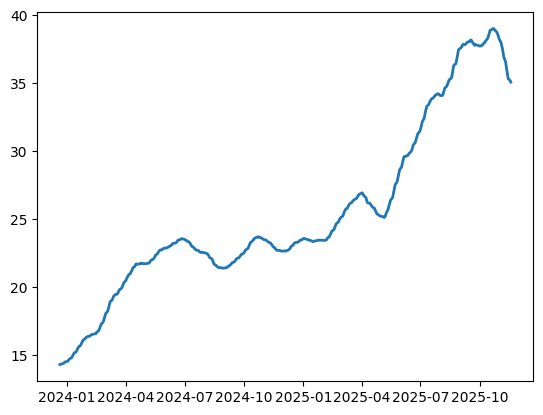

In [28]:
# Moving average plot 
df["MA20"] = df["close"].rolling(window=20).mean()
plt.plot(df.time, df.MA20, linewidth = 2)
